# NLP`

# Bag_Of_Words Approach

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np

C:\Users\Rohan\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Rohan\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\Rohan\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1') #By default encoding is 'utf8' you can do this 'ISO-8859-1' or 'latin1',
df.head(20)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


## Selecting the Features

In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1', usecols=['v1','v2'])
df.head(20)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


## Replacing  columns: ham to Not Spam

In [4]:
df['v1'] = df['v1'].replace({'ham':'Not Spam'})

In [5]:
df.head()

,v1,v2
0,Not Spam,"Go until jurong point, crazy.. Available only ..."
1,Not Spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,Not Spam,U dun say so early hor... U c already then say...
4,Not Spam,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.shape

(5572, 2)

In [8]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

## Renaming the columns

In [9]:
df = df.rename(columns={'v1':'Category', 'v2':'Message'})

In [10]:
df.head()

,Category,Message
0,Not Spam,"Go until jurong point, crazy.. Available only ..."
1,Not Spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,Not Spam,U dun say so early hor... U c already then say...
4,Not Spam,"Nah I don't think he goes to usf, he lives aro..."


## train_test_split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2, random_state=42)

In [13]:
print(X_train)
X_train.shape

1978    No I'm in the same boat. Still here at my moms...
3989    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935       They r giving a second chance to rahul dengra.
4078       O i played smash bros  &lt;#&gt;  religiously.
4086    PRIVATE! Your 2003 Account Statement for 07973...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: Message, Length: 4457, dtype: object


(4457,)

In [14]:
print(y_train)
y_train.shape

1978    Not Spam
3989        spam
3935    Not Spam
4078    Not Spam
4086        spam
          ...   
3772    Not Spam
5191    Not Spam
5226    Not Spam
5390    Not Spam
860     Not Spam
Name: Category, Length: 4457, dtype: object


(4457,)

In [15]:
print(X_test)
X_test.shape

3245    Funny fact Nobody teaches volcanoes 2 erupt, t...
944     I sent my scores to sophas and i had to do sec...
1044    We know someone who you know that fancies you....
2484    Only if you promise your getting out as SOON a...
812     Congratulations ur awarded either å£500 of CD ...
                              ...                        
4264     &lt;DECIMAL&gt; m but its not a common car he...
2439    Rightio. 11.48 it is then. Well arent we all u...
5556    Yes i have. So that's why u texted. Pshew...mi...
4205                               Get the door, I'm here
4293    Kit Strip - you have been billed 150p. Netcoll...
Name: Message, Length: 1115, dtype: object


(1115,)

In [16]:
print(y_test)
y_test.shape

3245    Not Spam
944     Not Spam
1044        spam
2484    Not Spam
812         spam
          ...   
4264    Not Spam
2439    Not Spam
5556    Not Spam
4205    Not Spam
4293        spam
Name: Category, Length: 1115, dtype: object


(1115,)

## Import CountVectorizer

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
vectorizer = CountVectorizer()

In [19]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [20]:
X_train

<4457x7735 sparse matrix of type '<class 'numpy.int64'>'
	with 58978 stored elements in Compressed Sparse Row format>

In [21]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
X_test

<1115x7735 sparse matrix of type '<class 'numpy.int64'>'
	with 13941 stored elements in Compressed Sparse Row format>

In [23]:
X_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
X_train

<4457x7735 sparse matrix of type '<class 'numpy.int64'>'
	with 58978 stored elements in Compressed Sparse Row format>

In [25]:
X_test

<1115x7735 sparse matrix of type '<class 'numpy.int64'>'
	with 13941 stored elements in Compressed Sparse Row format>

In [26]:
y_train

1978    Not Spam
3989        spam
3935    Not Spam
4078    Not Spam
4086        spam
          ...   
3772    Not Spam
5191    Not Spam
5226    Not Spam
5390    Not Spam
860     Not Spam
Name: Category, Length: 4457, dtype: object

In [27]:
y_test

3245    Not Spam
944     Not Spam
1044        spam
2484    Not Spam
812         spam
          ...   
4264    Not Spam
2439    Not Spam
5556    Not Spam
4205    Not Spam
4293        spam
Name: Category, Length: 1115, dtype: object

## Apply Multinomial Naive Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB

In [29]:
classifier = MultinomialNB()

In [30]:
classifier.fit(X_train, y_train)

MultinomialNB()

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
y_pred

array(['Not Spam', 'Not Spam', 'spam', ..., 'Not Spam', 'Not Spam',
       'spam'], dtype='<U8')

## Check the Accuracy

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
bow_accuracy = accuracy_score(y_test, y_pred)*100

In [35]:
bow_accuracy

98.38565022421525

In [36]:
result = np.round(accuracy_score(y_test, y_pred)*100,2)

In [37]:
result

98.39

## Save the model

In [38]:
import joblib
model = joblib.dump(classifier,'Multinomial_with_BOW')

## Use the model

In [39]:
import joblib
final_model = joblib.load('MultinomialNB')

In [40]:
final_model.predict(X_test)

array(['Not Spam', 'Not Spam', 'spam', ..., 'Not Spam', 'Not Spam',
       'spam'], dtype='<U8')

In [41]:
df['Message'][56]

'Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, Matrix3, StarWars3, etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out! '

In [42]:
input_data = np.array([input('Enter the E-mail sentence:\n')])

def pred(input_data, classifier, vectorizer):
    
    corpus = vectorizer.transform(input_data)
    prediction = classifier.predict(corpus)
    return prediction

output = pred(input_data, classifier, vectorizer)
print('Mail is:', output)


Enter the E-mail sentence:
'Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, Matrix3, StarWars3, etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out! '
Mail is: ['spam']


# TF_IDF Approach

In [43]:
import pandas as pd
import numpy as np

In [44]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head(20)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


# Selecting Features

In [45]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1', usecols=['v1','v2'])
df.head(20)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


# Replacing  Features: ham to Not Spam

In [46]:
df['v1'] = df['v1'].replace({'ham':'Not_Spam'})

In [47]:
df.head()

,v1,v2
0,Not_Spam,"Go until jurong point, crazy.. Available only ..."
1,Not_Spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,Not_Spam,U dun say so early hor... U c already then say...
4,Not_Spam,"Nah I don't think he goes to usf, he lives aro..."


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [49]:
df.shape

(5572, 2)

In [50]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

# Renaming the Features

In [51]:
df = df.rename(columns={'v1':'Category', 'v2':'Message'})

In [52]:
df

,Category,Message
0,Not_Spam,"Go until jurong point, crazy.. Available only ..."
1,Not_Spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,Not_Spam,U dun say so early hor... U c already then say...
4,Not_Spam,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,Not_Spam,Will Ì_ b going to esplanade fr home?
5569,Not_Spam,"Pity, * was in mood for that. So...any other s..."
5570,Not_Spam,The guy did some bitching but I acted like i'd...


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df['Message'], df['Category'], test_size=0.2, random_state=42)

In [55]:
print(X1_train)
X1_train.shape

1978    No I'm in the same boat. Still here at my moms...
3989    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935       They r giving a second chance to rahul dengra.
4078       O i played smash bros  &lt;#&gt;  religiously.
4086    PRIVATE! Your 2003 Account Statement for 07973...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: Message, Length: 4457, dtype: object


(4457,)

In [56]:
print(X1_test)
X1_test.shape

3245    Funny fact Nobody teaches volcanoes 2 erupt, t...
944     I sent my scores to sophas and i had to do sec...
1044    We know someone who you know that fancies you....
2484    Only if you promise your getting out as SOON a...
812     Congratulations ur awarded either å£500 of CD ...
                              ...                        
4264     &lt;DECIMAL&gt; m but its not a common car he...
2439    Rightio. 11.48 it is then. Well arent we all u...
5556    Yes i have. So that's why u texted. Pshew...mi...
4205                               Get the door, I'm here
4293    Kit Strip - you have been billed 150p. Netcoll...
Name: Message, Length: 1115, dtype: object


(1115,)

In [57]:
print(y1_train)
y1_train.shape

1978    Not_Spam
3989        spam
3935    Not_Spam
4078    Not_Spam
4086        spam
          ...   
3772    Not_Spam
5191    Not_Spam
5226    Not_Spam
5390    Not_Spam
860     Not_Spam
Name: Category, Length: 4457, dtype: object


(4457,)

In [58]:
print(y1_test)
y1_test.shape

3245    Not_Spam
944     Not_Spam
1044        spam
2484    Not_Spam
812         spam
          ...   
4264    Not_Spam
2439    Not_Spam
5556    Not_Spam
4205    Not_Spam
4293        spam
Name: Category, Length: 1115, dtype: object


(1115,)

# Import Tfidf Vectorizer

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
tf_idf = TfidfVectorizer()

In [61]:
X1_train = tf_idf.fit_transform(X1_train)
X1_test = tf_idf.transform(X1_test)

In [62]:
X1_train

<4457x7735 sparse matrix of type '<class 'numpy.float64'>'
	with 58978 stored elements in Compressed Sparse Row format>

In [63]:
X1_train.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24340433, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [64]:
X1_test

<1115x7735 sparse matrix of type '<class 'numpy.float64'>'
	with 13941 stored elements in Compressed Sparse Row format>

In [65]:
X1_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
tfidf_df = pd.DataFrame(X1_train.toarray(), columns=tf_idf.get_feature_names_out())

In [67]:
tfidf_df

,00,000,000pes,008704050406,0089,0121,01223585236,0125698789,02,0207,...,ìï,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.243404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4452,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4453,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4454,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4455,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
from sklearn.naive_bayes import MultinomialNB

In [69]:
classifier = MultinomialNB()

In [70]:
classifier.fit(X1_train, y1_train)

MultinomialNB()

In [71]:
y_pred = classifier.predict(X1_test)

In [72]:
y_pred

array(['Not_Spam', 'Not_Spam', 'Not_Spam', ..., 'Not_Spam', 'Not_Spam',
       'spam'], dtype='<U8')

In [73]:
y1_test

3245    Not_Spam
944     Not_Spam
1044        spam
2484    Not_Spam
812         spam
          ...   
4264    Not_Spam
2439    Not_Spam
5556    Not_Spam
4205    Not_Spam
4293        spam
Name: Category, Length: 1115, dtype: object

In [74]:
y_pred

array(['Not_Spam', 'Not_Spam', 'Not_Spam', ..., 'Not_Spam', 'Not_Spam',
       'spam'], dtype='<U8')

In [75]:
y_pred = pd.DataFrame(y_pred, columns=['Predicted_output'])

In [76]:
y_pred

,Predicted_output
0,Not_Spam
1,Not_Spam
2,Not_Spam
3,Not_Spam
4,spam
...,...
1110,Not_Spam
1111,Not_Spam
1112,Not_Spam
1113,Not_Spam


In [77]:
y1_test = pd.DataFrame(y1_test)
y1_test

,Category
3245,Not_Spam
944,Not_Spam
1044,spam
2484,Not_Spam
812,spam
...,...
4264,Not_Spam
2439,Not_Spam
5556,Not_Spam
4205,Not_Spam


In [78]:
from sklearn.metrics import accuracy_score

In [79]:
tf_idf_accuracy = accuracy_score(y1_test, y_pred)*100

In [80]:
tf_idf_accuracy

96.23318385650225

In [81]:
result1 = np.round(accuracy_score(y1_test, y_pred),2)*100

In [82]:
result1

96.0

In [83]:
import joblib
model = joblib.dump(classifier,'Multinomial_with_tfidf')

In [84]:
import joblib
final_model = joblib.load('Multinomial_with_tfidf')

In [85]:
final_model.predict(X1_test)

array(['Not_Spam', 'Not_Spam', 'Not_Spam', ..., 'Not_Spam', 'Not_Spam',
       'spam'], dtype='<U8')

In [86]:
df['Message'][50]

'What you thinked about me. First time you saw me in class.'

In [87]:
input_data1 = np.array([input('Enter the E-mail sentence:\n')])

def pred(input_data, classifier, vectorizer):
    
    corpus = vectorizer.transform(input_data)
    prediction = classifier.predict(corpus)
    return prediction

output1 = pred(input_data, classifier, vectorizer)
print('Mail is:', output)

Enter the E-mail sentence:
'Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, Matrix3, StarWars3, etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out! '
Mail is: ['spam']


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Rohan\anaconda3\lib\site-packages\seaborn\_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\Rohan\anaconda3\lib\site-packages\seaborn\_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


[]

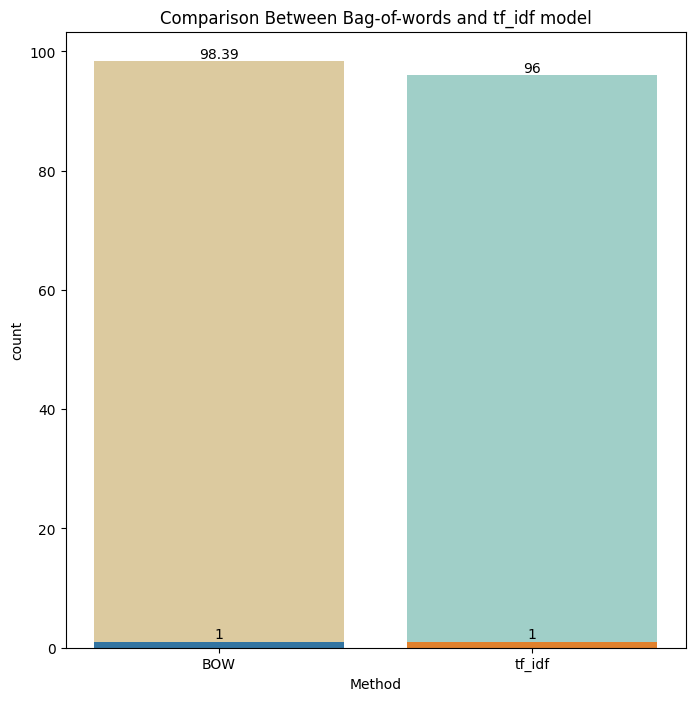

In [89]:
methods = ['BOW', 'tf_idf']
accuracy = [result, result1]

plt.figure(figsize=(8,8))
sns.barplot(x=methods, y=accuracy, palette='BrBG')

plt.xlabel('Method')
plt.ylabel('Accuracy (%)')
plt.title('Comparison Between Bag-of-words and tf_idf model')


x= sns.countplot(x= methods, data=df)

for bars in x.containers:
    x.bar_label(bars)

plt.plot()